# PART 1

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
image = cv2.imread('Images/road.png')

In [5]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

(704, 1279, 3)


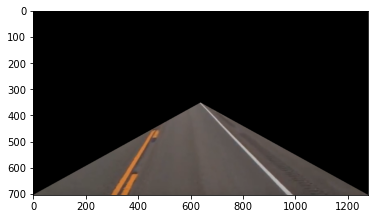

In [9]:
print(image.shape)
height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [
    (0,height),
    (width/2,height/2),
    (width,height)
]

def region_of_interest(img,vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_image = cv2.bitwise_and(img,mask)
    return masked_image

cropped_image = region_of_interest(image,np.array([region_of_interest_vertices],np.int32))

plt.imshow(cropped_image)

In [ ]:
# here
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image,100,200)


cropped_image = region_of_interest(image,np.array([region_of_interest_vertices],np.int32))




plt.imshow(canny_image)

# PART 2

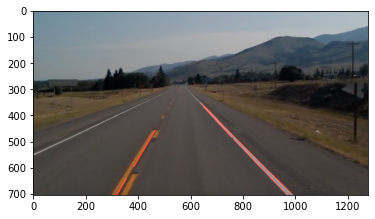

In [16]:
def region_of_interest(img,vertices):
    mask = np.zeros_like(img)
    # channel_count = img.shape[2]
    match_mask_color =255
    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_image = cv2.bitwise_and(img,mask)
    return masked_image

def draw_the_lines(img,lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)


    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_image,(x1,y1),(x2,y2),(255,0,0),3)
    
    img = cv2.addWeighted(img,0.8,blank_image,1,0.0)
    return img
    
    
image = cv2.imread('Images/road.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [
    (0,height),
    (width/2,height/2),
    (width,height)
]

# here
gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image,100,200)

cropped_image = region_of_interest(canny_image,np.array([region_of_interest_vertices],np.int32))


#here
lines = cv2.HoughLinesP(cropped_image,
                       rho = 6,
                        theta = np.pi/60,
                        threshold = 160,
                        lines = np.array([]),
                        minLineLength=40,
                        maxLineGap=25
                       )

image_with_lines = draw_the_lines(image,lines)

plt.imshow(image_with_lines)

# This concept with video

In [21]:
def region_of_interest(img,vertices):
    mask = np.zeros_like(img)
    # channel_count = img.shape[2]
    match_mask_color =255
    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_image = cv2.bitwise_and(img,mask)
    return masked_image

def draw_the_lines(img,lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0],img.shape[1],3),dtype=np.uint8)


    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_image,(x1,y1),(x2,y2),(255,0,0),3)
    
    img = cv2.addWeighted(img,0.8,blank_image,1,0.0)
    return img
    
    
# image = cv2.imread('Images/road.png')
# image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

def process(image):

    height = image.shape[0]
    width = image.shape[1]

    region_of_interest_vertices = [
        (0,height),
        (width/2,height/2),
        (width,height)
    ]

    # here
    gray_image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    canny_image = cv2.Canny(gray_image,100,120)

    cropped_image = region_of_interest(canny_image,np.array([region_of_interest_vertices],np.int32))


    #here
    lines = cv2.HoughLinesP(cropped_image,
                           rho = 2,
                            theta = np.pi/180,
                            threshold = 50,
                            lines = np.array([]),
                            minLineLength=40,
                            maxLineGap=100
                           )

    image_with_lines = draw_the_lines(image,lines)
    return image_with_lines

cap = cv2.VideoCapture('Videos/test2.mp4')
while(cap.isOpened()):
    ret,frame = cap.read()
    frame = process(frame)
    cv2.imshow('frame',frame)
    
    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# plt.imshow(image_with_lines)